In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm
import numpy as np
from matplotlib import colors

In [2]:
def add_season_to_df(df):
    df = df.reset_index()
    df["season"] = np.nan
    df.loc[df.time.dt.month.isin([12, 1, 2]), "season"] = "DJF"
    df.loc[df.time.dt.month.isin([3, 4, 5]), "season"] = "MAM"
    df.loc[df.time.dt.month.isin([6, 7, 8]), "season"] = "JJA"
    df.loc[df.time.dt.month.isin([9, 10, 11]), "season"] = "SON"
    return df

In [3]:
init = "00"
years = ["2018", "2019", "2020", "2021"]
savedir = "/home/lgaudet/AI2ES/Processed_Data/Forecast_and_Error/"

nam_fcast_and_error = []
gfs_fcast_and_error = []
hrrr_fcast_and_error = []

for year in years:
    nam_fcast_and_error.append(
        pd.read_parquet(
            f"{savedir}nam_fcast_and_error_df_{init}z_{year}_mask_water.parquet"
        )
    )
    gfs_fcast_and_error.append(
        pd.read_parquet(
            f"{savedir}gfs_fcast_and_error_df_{init}z_{year}_mask_water.parquet"
        )
    )
    hrrr_fcast_and_error.append(
        pd.read_parquet(
            f"{savedir}hrrr_fcast_and_error_df_{init}z_{year}_mask_water.parquet"
        )
    )

nam_fcast_and_error_df = pd.concat(nam_fcast_and_error)
gfs_fcast_and_error_df = pd.concat(gfs_fcast_and_error)
hrrr_fcast_and_error_df = pd.concat(hrrr_fcast_and_error)

In [4]:
nam_fcast_and_error_df = add_season_to_df(nam_fcast_and_error_df)
gfs_fcast_and_error_df = add_season_to_df(gfs_fcast_and_error_df)
hrrr_fcast_and_error_df = add_season_to_df(hrrr_fcast_and_error_df)

In [5]:
def plot_2dhist_wind_speed(df, model, title_opt):
    Z, xedges, yedges = np.histogram2d(
        df["u_total_error"], df[f"u_total_{model}"], bins=100
    )
    x_width = xedges[1] - xedges[0]
    x_centers = xedges[1:] - x_width / 2
    y_width = yedges[1] - yedges[0]
    y_centers = yedges[1:] - y_width / 2

    plt.figure(figsize=(6, 4), dpi=100)
    plt.pcolormesh(
        xedges,
        yedges,
        np.ma.masked_where(Z == 0, Z).T,
        cmap=cm.magma,
        norm=LogNorm(vmax=1e4),
    )
    plt.colorbar()
    plt.contour(
        x_centers,
        y_centers,
        np.ma.masked_where(Z == 0, Z).T,
        levels=[1e2, 1e3, 1e4],
        colors="cyan",
    )
    plt.vlines(0, 0, 20, colors="lightgrey", linewidth=3)
    plt.plot([0, 15], [0, 15], color="dimgrey", linewidth=3, linestyle="--")
    plt.ylim([0, 20])
    plt.xlim([-15, 15])
    plt.title(f"{model}: {title_opt}")
    plt.xlabel("10-m Wind Error (m s$^{-1}$)")
    plt.ylabel("10-m Wind Speed Forecast (m s$^{-1}$)")
    # plt.savefig(f'../Figures/2dhist_u_total_fcast_error_{model}_{title_opt}_{init}z.png', dpi=200, facecolor='white', transparent=False)

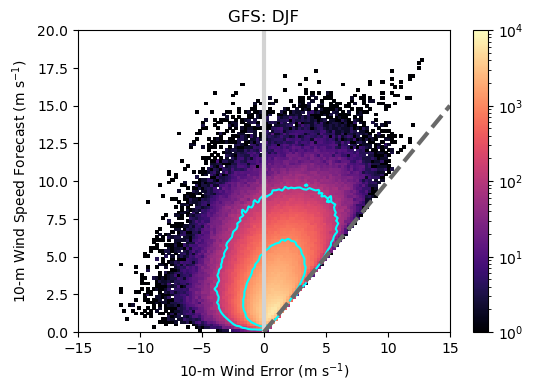

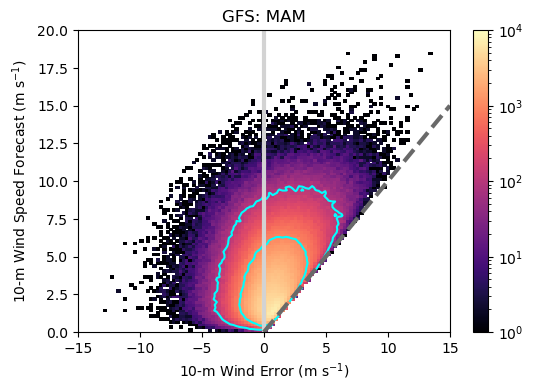

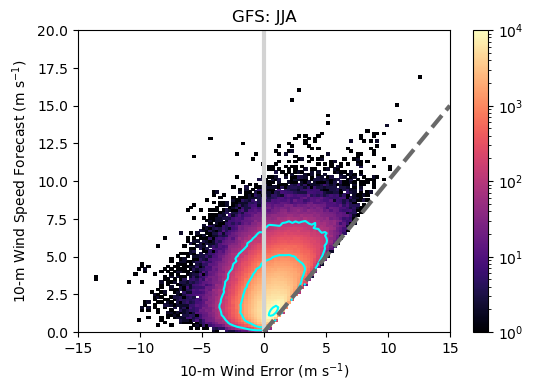

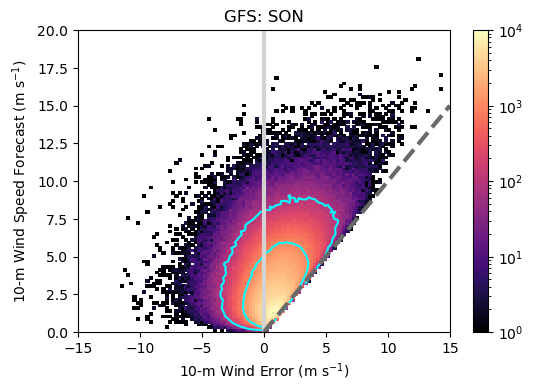

In [6]:
plot_2dhist_wind_speed(
    gfs_fcast_and_error_df[gfs_fcast_and_error_df["season"] == "DJF"], "GFS", "DJF"
)
plot_2dhist_wind_speed(
    gfs_fcast_and_error_df[gfs_fcast_and_error_df["season"] == "MAM"], "GFS", "MAM"
)
plot_2dhist_wind_speed(
    gfs_fcast_and_error_df[gfs_fcast_and_error_df["season"] == "JJA"], "GFS", "JJA"
)
plot_2dhist_wind_speed(
    gfs_fcast_and_error_df[gfs_fcast_and_error_df["season"] == "SON"], "GFS", "SON"
)

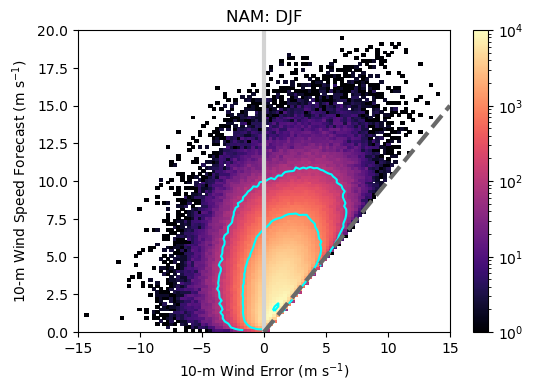

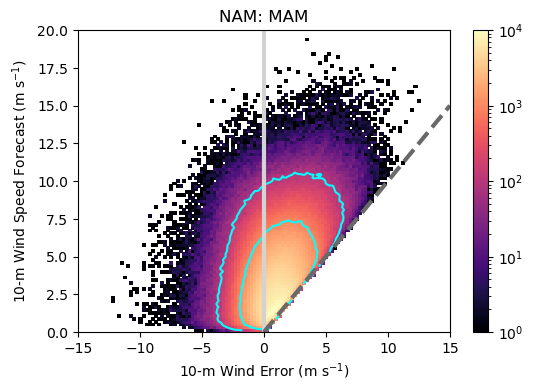

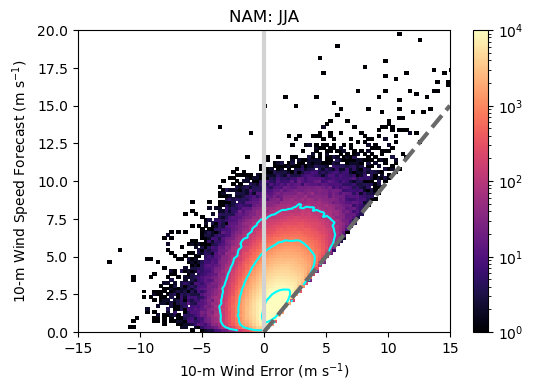

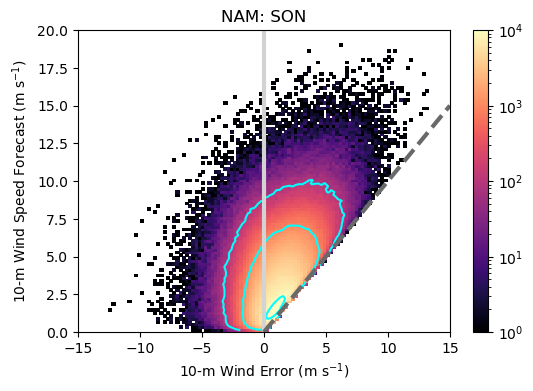

In [7]:
plot_2dhist_wind_speed(
    nam_fcast_and_error_df[nam_fcast_and_error_df["season"] == "DJF"], "NAM", "DJF"
)
plot_2dhist_wind_speed(
    nam_fcast_and_error_df[nam_fcast_and_error_df["season"] == "MAM"], "NAM", "MAM"
)
plot_2dhist_wind_speed(
    nam_fcast_and_error_df[nam_fcast_and_error_df["season"] == "JJA"], "NAM", "JJA"
)
plot_2dhist_wind_speed(
    nam_fcast_and_error_df[nam_fcast_and_error_df["season"] == "SON"], "NAM", "SON"
)

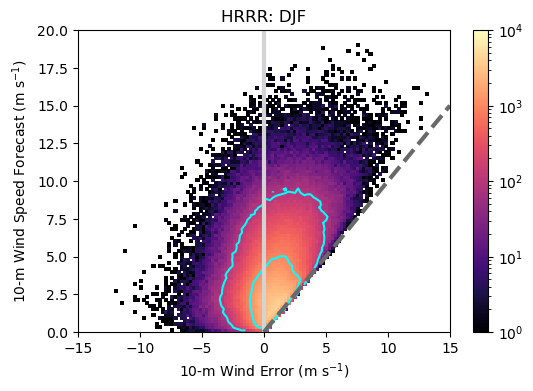

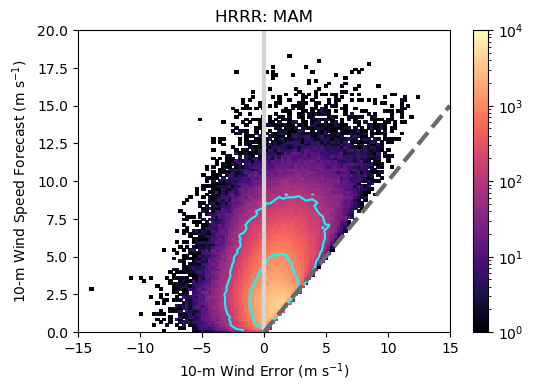

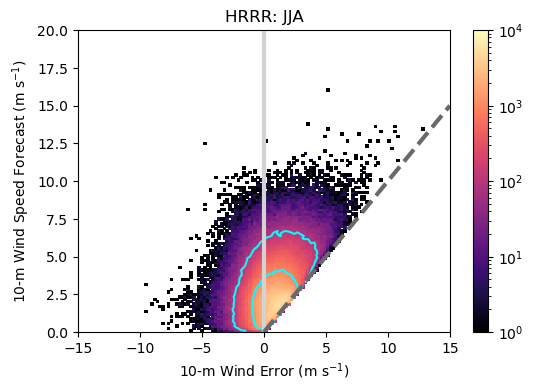

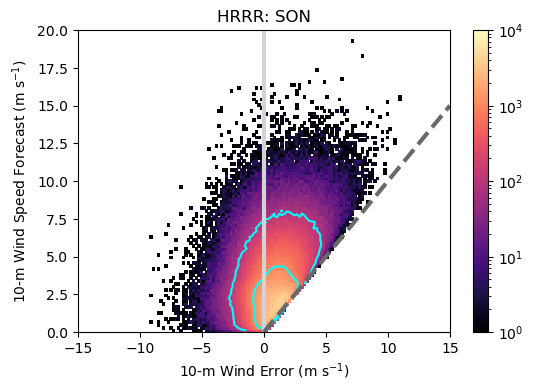

In [8]:
plot_2dhist_wind_speed(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["season"] == "DJF"], "HRRR", "DJF"
)
plot_2dhist_wind_speed(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["season"] == "MAM"], "HRRR", "MAM"
)
plot_2dhist_wind_speed(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["season"] == "JJA"], "HRRR", "JJA"
)
plot_2dhist_wind_speed(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["season"] == "SON"], "HRRR", "SON"
)

In [9]:
def plot_2dhist_t2m(df, model, title_opt):
    Z, xedges, yedges = np.histogram2d(df["t2m_error"], df[f"t2m_{model}"], bins=100)
    x_width = xedges[1] - xedges[0]
    x_centers = xedges[1:] - x_width / 2
    y_width = yedges[1] - yedges[0]
    y_centers = yedges[1:] - y_width / 2

    plt.figure(figsize=(6, 4), dpi=100)
    plt.pcolormesh(
        xedges,
        yedges,
        np.ma.masked_where(Z == 0, Z).T,
        cmap=cm.magma,
        norm=LogNorm(vmax=1e4),
    )
    plt.colorbar()
    plt.vlines(0, -40, 40, colors="lightgrey", linewidth=2)
    plt.hlines(0, -20, 20, colors="lightgrey", linewidth=2)
    plt.contour(
        x_centers,
        y_centers,
        np.ma.masked_where(Z == 0, Z).T,
        levels=[1e2, 1e3, 1e4],
        colors="cyan",
    )
    plt.ylim([-40, 40])
    plt.xlim([-20, 20])
    plt.title(f"{model}: {title_opt}")
    plt.xlabel("2-m Temperature Error ($^{\circ}$C)")
    plt.ylabel("2-m Temperature Forecast ($^{\circ}$C)")
    # plt.savefig(f'../Figures/2dhist_t2m_fcast_error_{model}_{title_opt}_{init}z.png', dpi=200, facecolor='white', transparent=False)

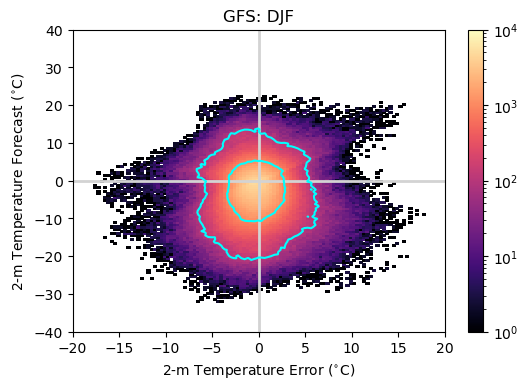

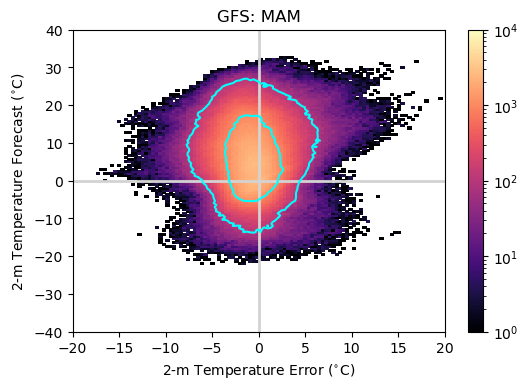

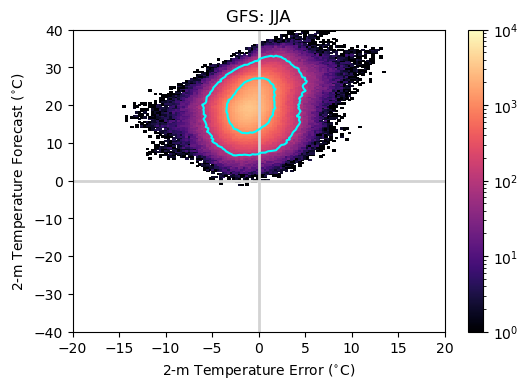

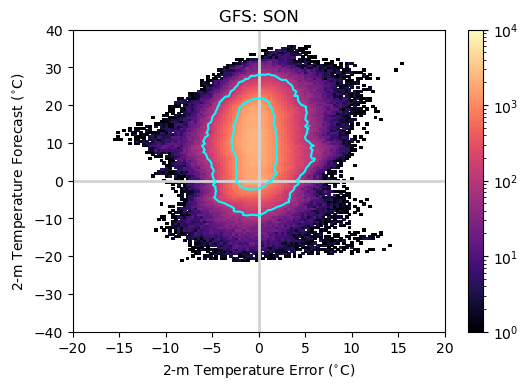

In [10]:
plot_2dhist_t2m(
    gfs_fcast_and_error_df[gfs_fcast_and_error_df["season"] == "DJF"], "GFS", "DJF"
)
plot_2dhist_t2m(
    gfs_fcast_and_error_df[gfs_fcast_and_error_df["season"] == "MAM"], "GFS", "MAM"
)
plot_2dhist_t2m(
    gfs_fcast_and_error_df[gfs_fcast_and_error_df["season"] == "JJA"], "GFS", "JJA"
)
plot_2dhist_t2m(
    gfs_fcast_and_error_df[gfs_fcast_and_error_df["season"] == "SON"], "GFS", "SON"
)

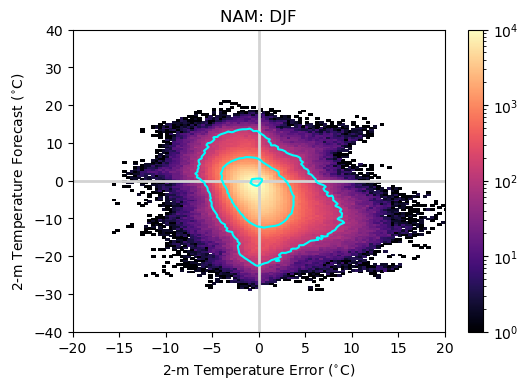

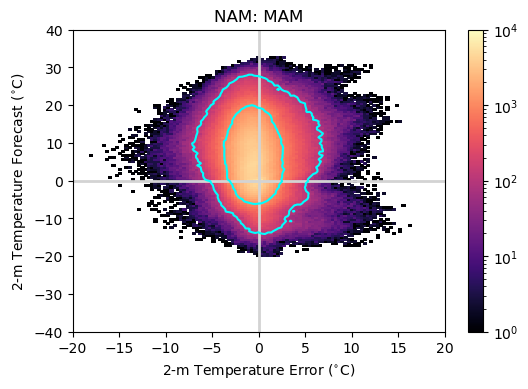

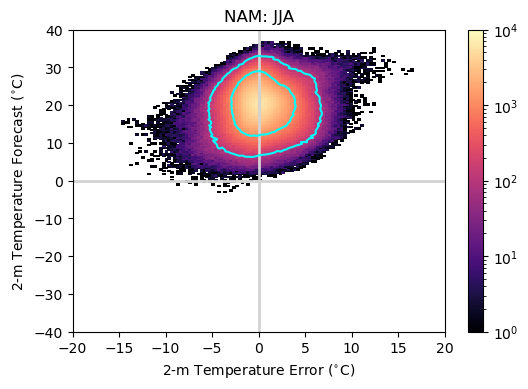

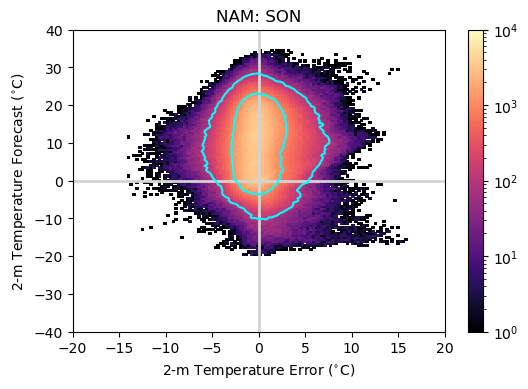

In [11]:
plot_2dhist_t2m(
    nam_fcast_and_error_df[nam_fcast_and_error_df["season"] == "DJF"], "NAM", "DJF"
)
plot_2dhist_t2m(
    nam_fcast_and_error_df[nam_fcast_and_error_df["season"] == "MAM"], "NAM", "MAM"
)
plot_2dhist_t2m(
    nam_fcast_and_error_df[nam_fcast_and_error_df["season"] == "JJA"], "NAM", "JJA"
)
plot_2dhist_t2m(
    nam_fcast_and_error_df[nam_fcast_and_error_df["season"] == "SON"], "NAM", "SON"
)

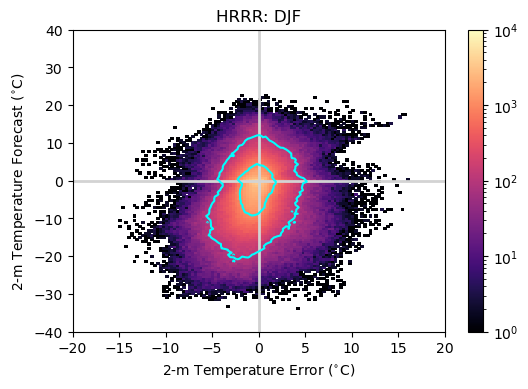

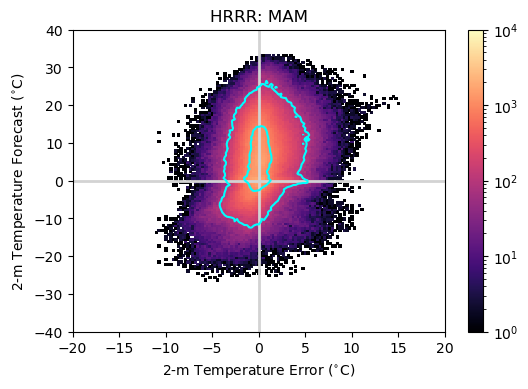

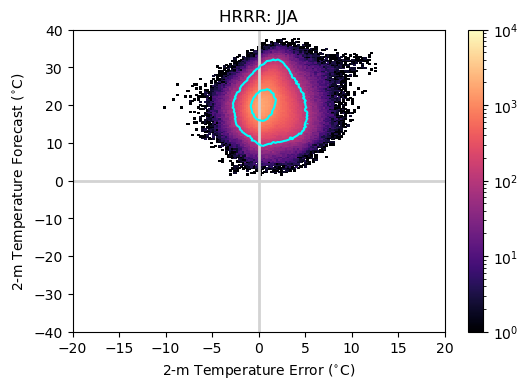

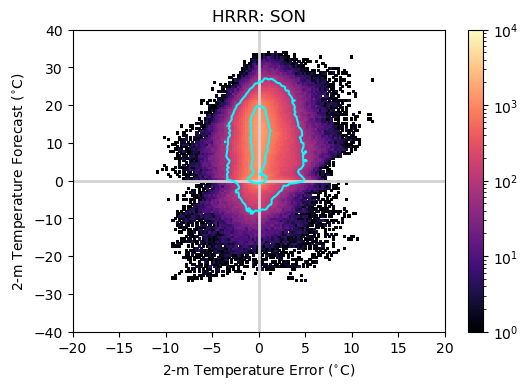

In [12]:
plot_2dhist_t2m(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["season"] == "DJF"], "HRRR", "DJF"
)
plot_2dhist_t2m(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["season"] == "MAM"], "HRRR", "MAM"
)
plot_2dhist_t2m(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["season"] == "JJA"], "HRRR", "JJA"
)
plot_2dhist_t2m(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["season"] == "SON"], "HRRR", "SON"
)

In [13]:
def plot_2dhist_wind_speed_obs(df, model):
    Z, xedges, yedges = np.histogram2d(
        df["u_total_error"], df[f"u_total_nysm"], bins=100
    )
    x_width = xedges[1] - xedges[0]
    x_centers = xedges[1:] - x_width / 2
    y_width = yedges[1] - yedges[0]
    y_centers = yedges[1:] - y_width / 2

    plt.figure(figsize=(6, 4), dpi=100)
    plt.pcolormesh(
        xedges,
        yedges,
        np.ma.masked_where(Z == 0, Z).T,
        cmap=cm.magma,
        norm=LogNorm(vmax=1e4),
    )
    plt.colorbar()
    plt.contour(
        x_centers,
        y_centers,
        np.ma.masked_where(Z == 0, Z).T,
        levels=[1e1, 1e2, 1e3, 1e4],
        colors="cyan",
    )
    plt.vlines(0, 0, 20, colors="lightgrey", linewidth=3)
    plt.plot([0, -15], [0, 15], color="dimgrey", linewidth=3, linestyle="--")
    plt.ylim([0, 20])
    plt.xlim([-15, 15])
    plt.title(model)
    plt.xlabel("10-m Wind Error (m s$^{-1}$)")
    plt.ylabel("10-m Wind Speed Observations (m s$^{-1}$)")
    # plt.savefig(f'../Figures/2dhist_u_total_obs_error_{model}_{init}z.png', dpi=200, facecolor='white', transparent=False)

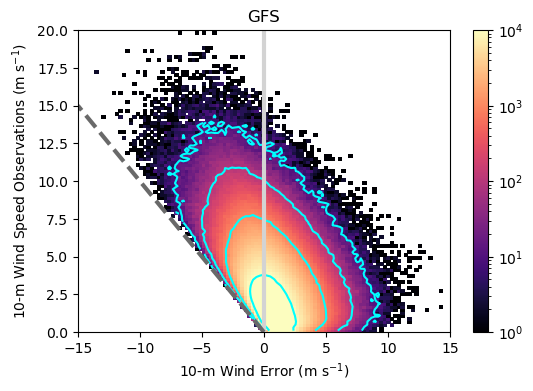

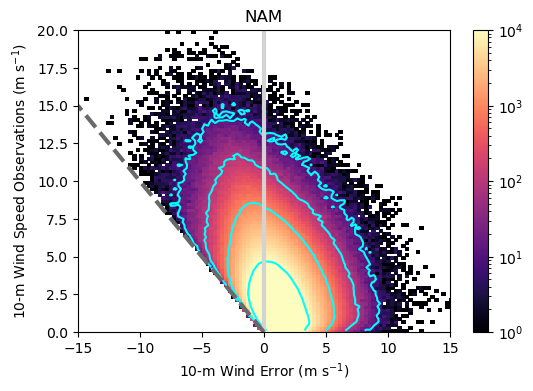

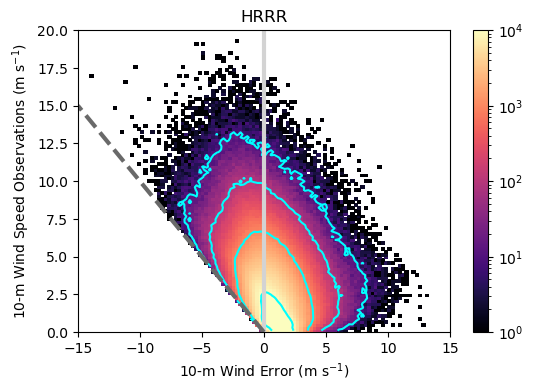

In [14]:
plot_2dhist_wind_speed_obs(gfs_fcast_and_error_df, "GFS")
plot_2dhist_wind_speed_obs(nam_fcast_and_error_df, "NAM")
plot_2dhist_wind_speed_obs(hrrr_fcast_and_error_df, "HRRR")

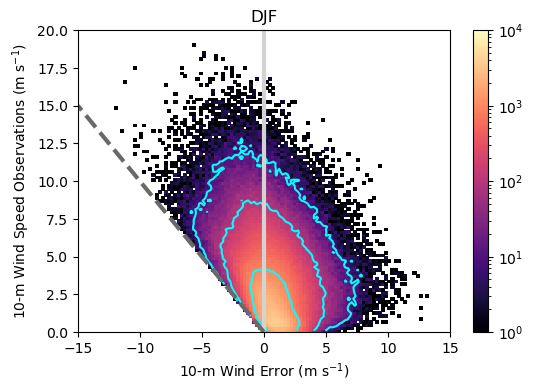

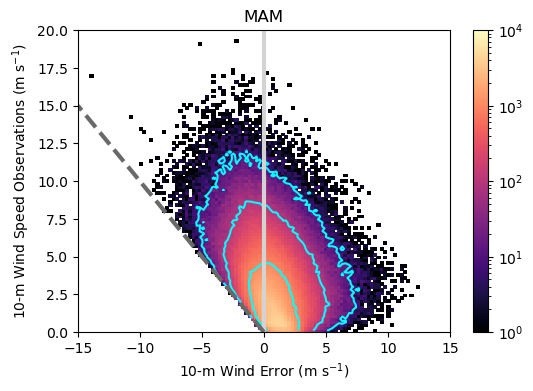

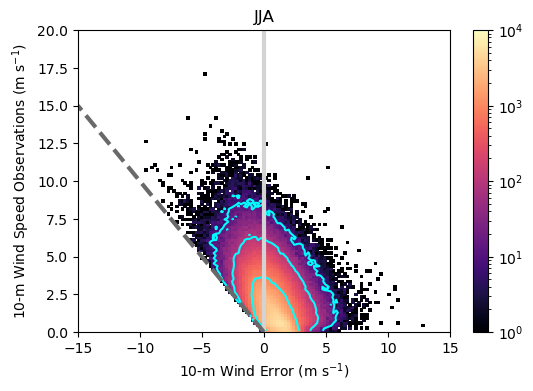

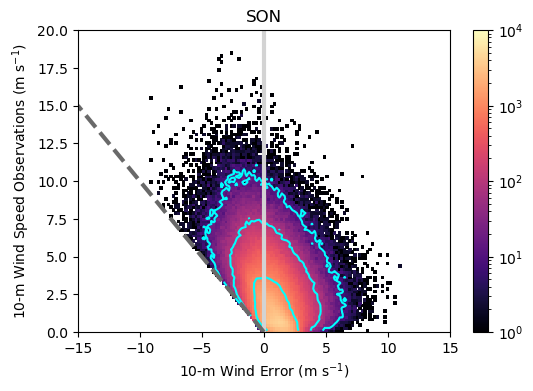

In [15]:
plot_2dhist_wind_speed_obs(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["season"] == "DJF"], "DJF"
)
plot_2dhist_wind_speed_obs(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["season"] == "MAM"], "MAM"
)
plot_2dhist_wind_speed_obs(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["season"] == "JJA"], "JJA"
)
plot_2dhist_wind_speed_obs(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["season"] == "SON"], "SON"
)

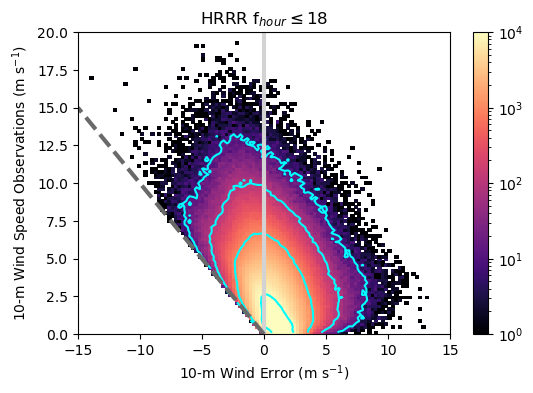

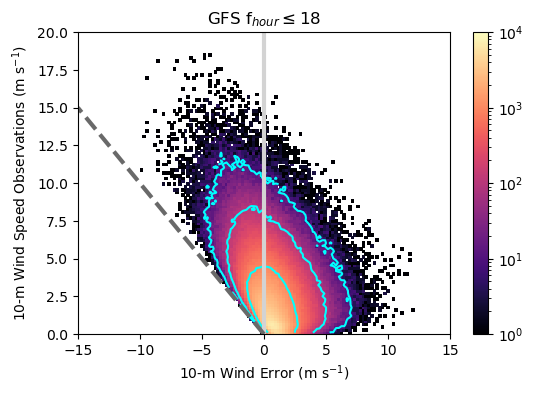

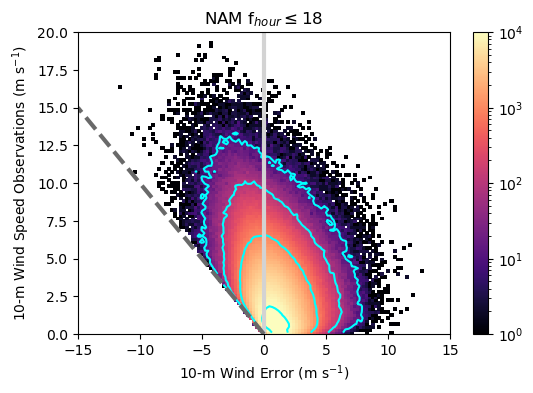

In [16]:
plot_2dhist_wind_speed_obs(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["lead_time_ONLY_HOURS"] <= 18],
    "HRRR f$_{hour} \leq 18$",
)
plot_2dhist_wind_speed_obs(
    gfs_fcast_and_error_df[gfs_fcast_and_error_df["lead_time_ONLY_HOURS"] <= 18],
    "GFS f$_{hour} \leq 18$",
)
plot_2dhist_wind_speed_obs(
    nam_fcast_and_error_df[nam_fcast_and_error_df["lead_time_ONLY_HOURS"] <= 18],
    "NAM f$_{hour} \leq 18$",
)

In [17]:
def plot_2dhist_t2m_obs(df, model):
    Z, xedges, yedges = np.histogram2d(df["t2m_error"], df[f"t2m_nysm"], bins=100)
    x_width = xedges[1] - xedges[0]
    x_centers = xedges[1:] - x_width / 2
    y_width = yedges[1] - yedges[0]
    y_centers = yedges[1:] - y_width / 2

    plt.figure(figsize=(6, 4), dpi=100)
    plt.pcolormesh(
        xedges,
        yedges,
        np.ma.masked_where(Z == 0, Z).T,
        cmap=cm.magma,
        norm=LogNorm(vmax=1e4),
    )
    plt.colorbar()
    plt.vlines(0, -40, 40, colors="lightgrey", linewidth=2)
    plt.hlines(0, -20, 20, colors="lightgrey", linewidth=2)
    plt.contour(
        x_centers,
        y_centers,
        np.ma.masked_where(Z == 0, Z).T,
        levels=[1e1, 1e2, 1e3],
        colors="cyan",
    )
    plt.ylim([-40, 40])
    plt.xlim([-20, 20])
    plt.title(f"{model}")
    plt.xlabel("2-m Temperature Error ($^{\circ}$C)")
    plt.ylabel("2-m Temperature Observation ($^{\circ}$C)")
    plt.savefig(
        f"../Figures/2dhist_t2m_obs_error_{model}_{init}z.png",
        dpi=200,
        facecolor="white",
        transparent=False,
    )

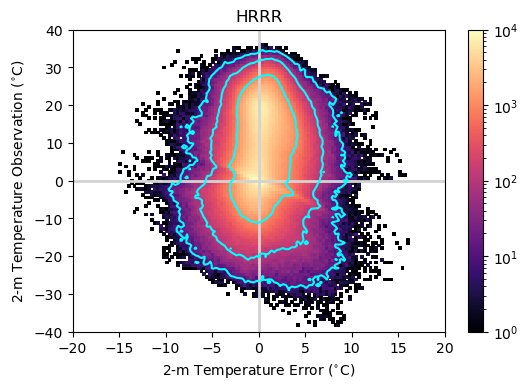

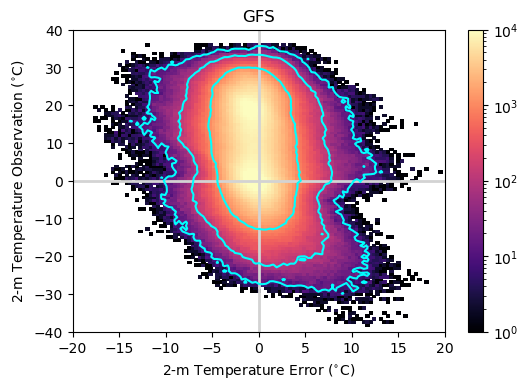

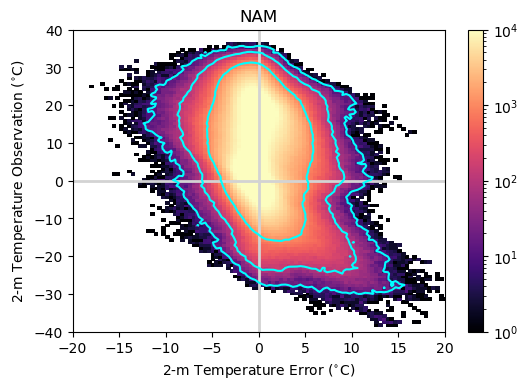

In [18]:
plot_2dhist_t2m_obs(hrrr_fcast_and_error_df, "HRRR")
plot_2dhist_t2m_obs(gfs_fcast_and_error_df, "GFS")
plot_2dhist_t2m_obs(nam_fcast_and_error_df, "NAM")

In [28]:
def percentage_points_below_forecast_thresh(df, nysm_thresh, err_thresh, var):
    per = (
        100.0
        * df[(df[f"{var}_nysm"] < nysm_thresh) & (df[f"{var}_error"] > err_thresh)].size
        / df[df[f"{var}_nysm"] < nysm_thresh].size
    )
    return np.round(per, 2)

In [29]:
hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["lead_time_ONLY_HOURS"] <= 18][
    "t2m_nysm"
].quantile(0.001)

-24.12020844268799

In [30]:
percentage_points_below_forecast_thresh(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["lead_time_ONLY_HOURS"] <= 18],
    -25.0,
    0.0,
    "t2m",
)

80.73

In [31]:
percentage_points_below_forecast_thresh(
    gfs_fcast_and_error_df[gfs_fcast_and_error_df["lead_time_ONLY_HOURS"] <= 18],
    -25.0,
    0.0,
    "t2m",
)

94.12

In [32]:
percentage_points_below_forecast_thresh(
    nam_fcast_and_error_df[nam_fcast_and_error_df["lead_time_ONLY_HOURS"] <= 18],
    -25.0,
    0.0,
    "t2m",
)

98.73

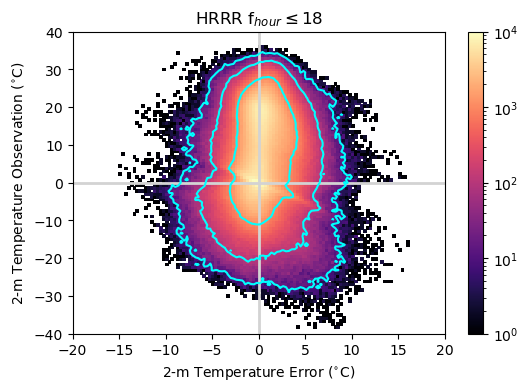

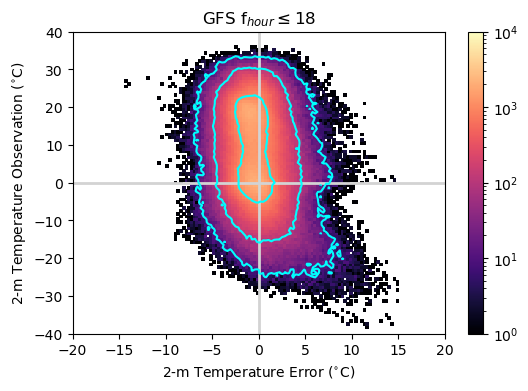

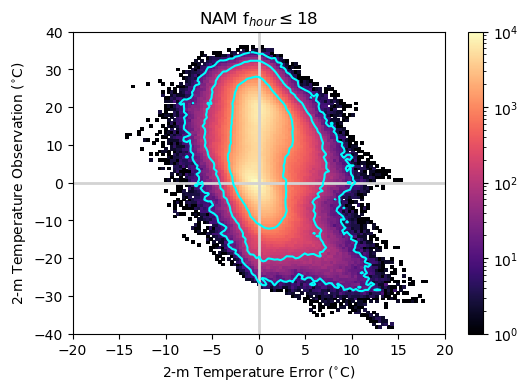

In [24]:
plot_2dhist_t2m_obs(
    hrrr_fcast_and_error_df[hrrr_fcast_and_error_df["lead_time_ONLY_HOURS"] <= 18],
    "HRRR f$_{hour} \leq 18$",
)
plot_2dhist_t2m_obs(
    gfs_fcast_and_error_df[gfs_fcast_and_error_df["lead_time_ONLY_HOURS"] <= 18],
    "GFS f$_{hour} \leq 18$",
)
plot_2dhist_t2m_obs(
    nam_fcast_and_error_df[nam_fcast_and_error_df["lead_time_ONLY_HOURS"] <= 18],
    "NAM f$_{hour} \leq 18$",
)

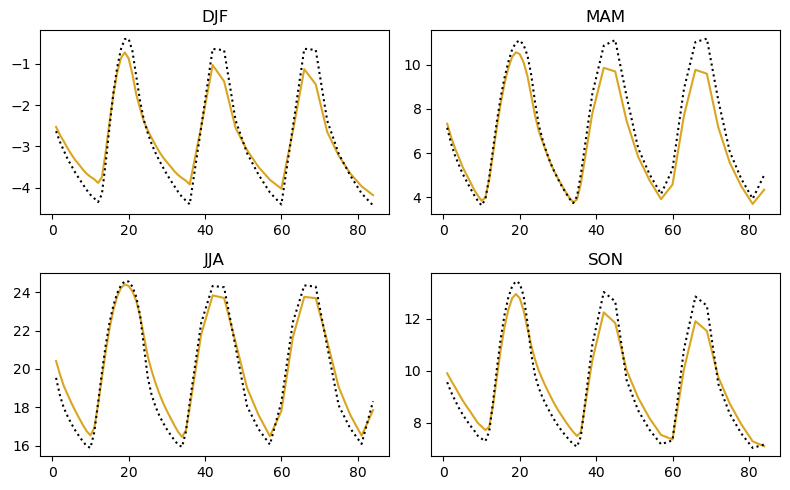

In [25]:
nam_diurnal_seasons = (
    nam_fcast_and_error_df[["t2m_NAM", "t2m_nysm", "lead_time_ONLY_HOURS", "season"]]
    .groupby(["season", "lead_time_ONLY_HOURS"])
    .mean()
)
seasons = ["DJF", "MAM", "JJA", "SON"]

plt.figure(figsize=(8, 5), dpi=100)

for ii, season in enumerate(seasons):
    plt.subplot(2, 2, ii + 1)
    data = nam_diurnal_seasons.loc[season]
    plt.plot(data.index, data["t2m_NAM"], color="goldenrod")
    plt.plot(data.index, data["t2m_nysm"], color="k", linestyle=":")
    plt.title(season)
plt.tight_layout()

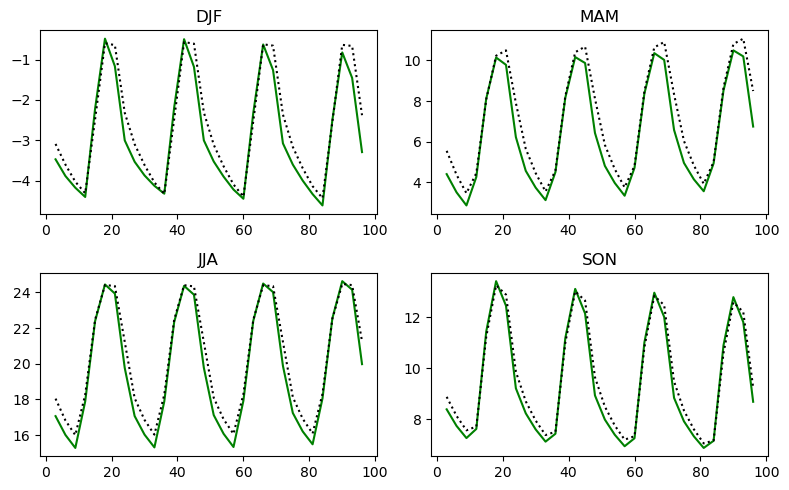

In [26]:
gfs_diurnal_seasons = (
    gfs_fcast_and_error_df[["t2m_GFS", "t2m_nysm", "lead_time_ONLY_HOURS", "season"]]
    .groupby(["season", "lead_time_ONLY_HOURS"])
    .mean()
)

seasons = ["DJF", "MAM", "JJA", "SON"]

plt.figure(figsize=(8, 5), dpi=100)
for ii, season in enumerate(seasons):
    plt.subplot(2, 2, ii + 1)
    data = gfs_diurnal_seasons.loc[season]
    plt.plot(data.index, data["t2m_GFS"], color="green")
    plt.plot(data.index, data["t2m_nysm"], color="k", linestyle=":")
    plt.title(season)
plt.tight_layout()

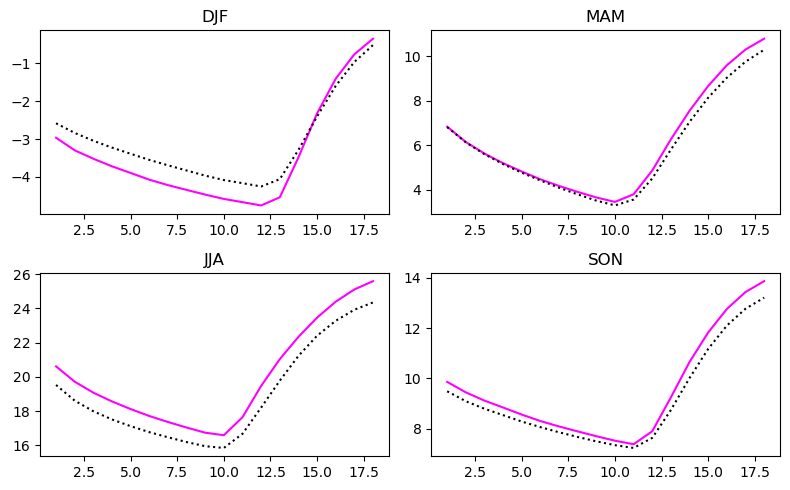

In [27]:
hrrr_diurnal_seasons = (
    hrrr_fcast_and_error_df[["t2m_HRRR", "t2m_nysm", "lead_time_ONLY_HOURS", "season"]]
    .groupby(["season", "lead_time_ONLY_HOURS"])
    .mean()
)

seasons = ["DJF", "MAM", "JJA", "SON"]

plt.figure(figsize=(8, 5), dpi=100)
for ii, season in enumerate(seasons):
    plt.subplot(2, 2, ii + 1)
    data = hrrr_diurnal_seasons.loc[season]
    plt.plot(data.index, data["t2m_HRRR"], color="magenta")
    plt.plot(data.index, data["t2m_nysm"], color="k", linestyle=":")
    plt.title(season)
plt.tight_layout()